In [238]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [239]:
df = pd.read_csv("faces.csv")

In [240]:
df.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,target
73,73,-0.917374,0.942663,-0.257429,1.447002,-0.268871,0.627252,-0.046882,-1.685941,0.525852,...,1.055401,-2.274048,-2.465725,3.886626,0.269167,0.430756,1.914558,0.902910,2.595966,charles
74,74,0.247517,0.990445,-0.223442,-0.373292,0.191925,-0.213439,0.248923,-1.730467,0.392964,...,0.463284,-1.416748,-0.058870,3.580489,0.723680,0.488406,2.272655,0.302743,2.920565,charles
75,75,-0.450970,-1.194208,0.475538,0.236720,-0.041058,-0.191835,-0.218016,0.102758,0.378250,...,-0.155984,0.853813,-0.187039,-0.234237,-0.218337,0.098499,0.087090,0.134367,0.432738,charles
76,76,-1.307045,0.576326,0.714174,-2.455469,-0.693765,-0.021244,0.972243,1.856137,1.052781,...,-0.587567,1.100624,0.493432,-0.216325,-0.353358,-1.215957,0.863190,0.387483,-0.714543,charles
77,77,-1.376472,0.448559,-0.938152,1.255337,0.124838,-0.105280,0.182059,-0.710798,0.531238,...,1.401774,-2.340869,-1.079947,1.640460,0.208107,-0.252765,2.125772,0.220471,1.678880,charles


In [316]:
X = np.array(df.drop(['Unnamed: 0', 'target'], axis=1))

In [318]:
X.shape

(78, 128)

In [319]:
y = np.array(df.target)

In [320]:
y.shape

(78,)

## MISTURANDO TUDO

In [321]:
from sklearn.utils import shuffle

In [322]:
trainX, trainY = shuffle(X, y, random_state=0)

## TRATAR LABELS

In [323]:
from sklearn.preprocessing import LabelEncoder

In [324]:
out_encoder = LabelEncoder()

In [325]:
out_encoder.fit(trainY)

LabelEncoder()

In [326]:
trainY = out_encoder.transform(trainY)

In [327]:
trainY

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

## VALIDATION

In [328]:
df_val = pd.read_csv("faces_validation.csv")

In [329]:
df_val.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,target
21,21,-0.585182,0.506860,0.113615,0.847161,0.972314,0.246608,0.489368,-0.229752,-0.121398,...,0.615384,-1.800110,-1.781654,2.644914,0.675368,0.134593,0.718869,0.185666,1.066420,charles
22,22,0.211507,0.705608,-0.319360,0.746849,0.671610,-0.831424,1.365845,-0.894239,-0.863984,...,0.987119,-1.993798,-1.045183,1.565684,-0.053970,-1.060496,1.673226,-1.152325,0.796766,charles
23,23,-0.923114,0.402916,0.223180,1.038836,0.823114,0.052488,0.797666,-0.110839,-0.666240,...,0.581508,-1.716912,-1.802735,2.382299,0.709166,-0.057983,0.978862,0.287745,1.126276,charles
24,24,-0.084849,0.931331,-0.226256,0.852367,0.235294,-0.693591,1.460718,-0.654452,-0.841600,...,0.863670,-1.888515,-0.986585,1.726360,-0.304588,-1.063153,1.653649,-1.038273,0.849434,charles
25,25,-0.012188,0.544110,0.012265,0.641852,0.421861,-0.781310,1.351522,-1.202856,-0.317362,...,1.123052,-1.697319,-1.315170,2.592839,0.336983,-0.573603,1.323194,-1.152797,1.538043,charles


In [330]:
valX = np.array(df_val.drop(['Unnamed: 0', 'target'], axis=1))
valY = np.array(df_val.target)
valX.shape

(26, 128)

In [331]:
out_encoder.fit(valY)

LabelEncoder()

In [332]:
valY = out_encoder.transform(valY)

## AVALIANDO ALGORITMOS

## KNN

In [333]:
from sklearn.neighbors import KNeighborsClassifier

In [334]:
knn = KNeighborsClassifier(n_neighbors=3)

In [335]:
knn.fit(trainX, trainY)

KNeighborsClassifier(n_neighbors=3)

In [336]:
yhat_train = knn.predict(trainX)
yhat_val   = knn.predict(valX) 

In [337]:
yhat_val

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0])

In [338]:
from sklearn.metrics import confusion_matrix

In [339]:
def print_confusion_matrix(model_name, valY, yhat_val):
    
    cm = confusion_matrix(valY, yhat_val)
    total = sum(sum(cm))
    acc = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    print("MODELO : {}".format(model_name))
    print("Acurácia: {:.4f}".format(acc))
    print("Sensitividade: {:.4f}".format(sensitivity))
    print("Especificidade: {:.4f}".format(specificity))
    
    from mlxtend.plotting import plot_confusion_matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5))
    plt.show()

MODELO : KNN
Acurácia: 0.8846
Sensitividade: 0.8571
Especificidade: 0.9167


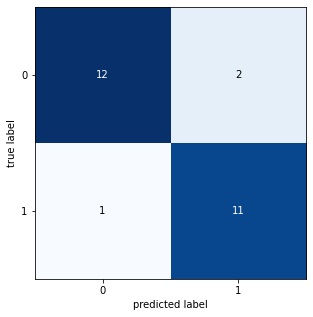

In [340]:
print_confusion_matrix("KNN", valY, yhat_val)

### SVM

In [341]:
from sklearn import svm

In [342]:
svm = svm.SVC()

In [343]:
svm.fit(trainX, trainY)

SVC()

In [344]:
yhat_train = svm.predict(trainX)
yhat_val   = svm.predict(valX) 

MODELO : SVM
Acurácia: 0.9231
Sensitividade: 1.0000
Especificidade: 0.8333


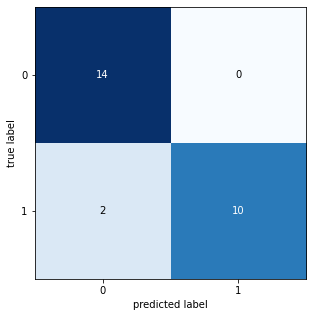

In [345]:
print_confusion_matrix("SVM", valY, yhat_val)

## USANDO O KERAS

In [346]:
from tensorflow.keras.utils import to_categorical

In [347]:
trainY = to_categorical(trainY)

In [348]:
valY = to_categorical(valY)

In [349]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [350]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(128,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 8,386
Trainable params: 8,386
Non-trainable params: 0
_________________________________________________________________


In [351]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
             metrics=['accuracy'])

In [352]:
model.fit(trainX, trainY, epochs=100, batch_size=8)

Epoch 1/100
10/10 [==============================] - 0s 9ms/step - loss: 0.8439 - accuracy: 0.5641
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.7949
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.8846
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1703 - accuracy: 0.9359
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.9231
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.9744
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.9231
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1128 - accuracy: 0.9487
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1024 - accuracy: 0.9487
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.9615
Epoch 11/

In [353]:
yhat_train = model.predict(trainX)
yhat_val   = model.predict(valX) 

In [355]:
yhat_val = np.argmax(yhat_val, axis=1)
yhat_val

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0])

In [356]:
valY = np.argmax(valY, axis=1)
valY

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

MODELO : KERAS
Acurácia: 0.8462
Sensitividade: 0.8571
Especificidade: 0.8333


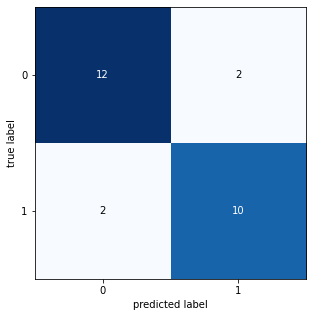

In [357]:
print_confusion_matrix("KERAS", valY, yhat_val)

In [358]:
model.save('faces.h5')